# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('C:\\Users\\beatr\\Documents\\Beatriz\\Ironhack\\lab-unsupervised-learning\Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
customers.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


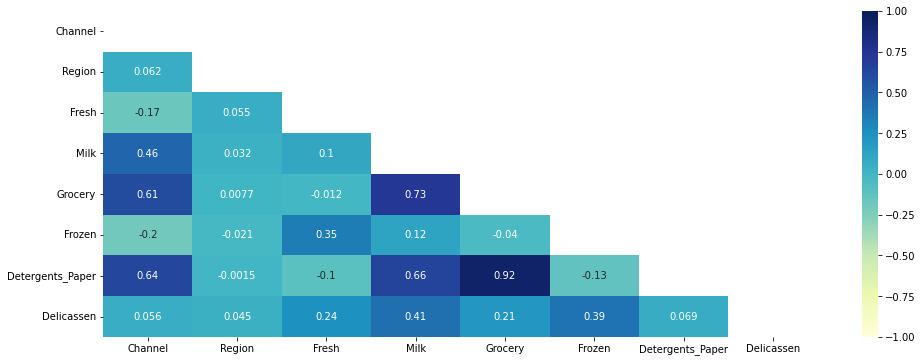

In [8]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(customers.corr(), dtype=bool))
sns.heatmap(customers.corr(), annot=True, vmax=1, vmin=-1, center=0, cmap="YlGnBu", mask=mask)
plt.show()

<AxesSubplot:xlabel='Grocery', ylabel='Detergents_Paper'>

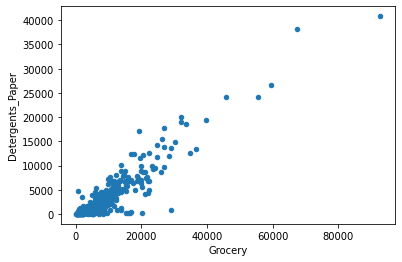

In [9]:
customers.plot.scatter('Grocery','Detergents_Paper')

<AxesSubplot:>

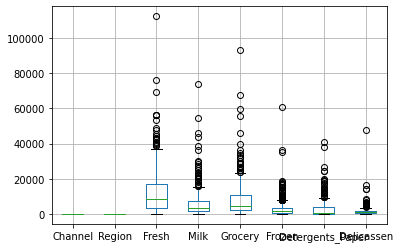

In [10]:
customers.boxplot()

<AxesSubplot:>

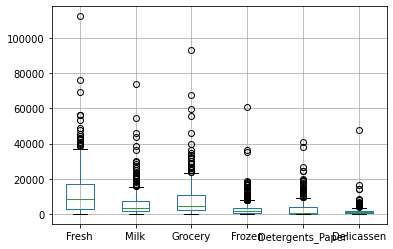

In [11]:
customers.boxplot(column = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"])

In [12]:
# Your observations here:
# - All the variable are already as numbers (integer) and we do not have NaN numbers.
# - There is a high correlation almost 1 between Grocery and Detergents_Paper
# - We have some outliers in Fresh, Milk, Grocery, Frozen, Detergents_Paper and Delicassen.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [13]:
# Your code here

In [14]:
# Your comment here:
# No, I will continue with the inicial data.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [15]:
#Imports:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaler.fit(customers)
customers_scale = scaler.transform(customers)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [17]:
#Imports:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans()
kmeans.fit(customers_scale)
customers['labels'] = kmeans.labels_

In [19]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


Count the values in `labels`.

In [20]:
customers['labels'].value_counts()

0    175
1    104
4     86
7     41
5     27
3      4
6      2
2      1
Name: labels, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [21]:
# Imports:
from sklearn.cluster import DBSCAN

In [22]:
DBSCAN_model = DBSCAN(eps=0.5)
DBSCAN_model.fit(customers_scale)
customers['labels_DBSCAN'] = DBSCAN_model.labels_

Count the values in `labels_DBSCAN`.

In [23]:
customers['labels_DBSCAN'].value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: labels_DBSCAN, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

c:\users\beatr\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\beatr\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


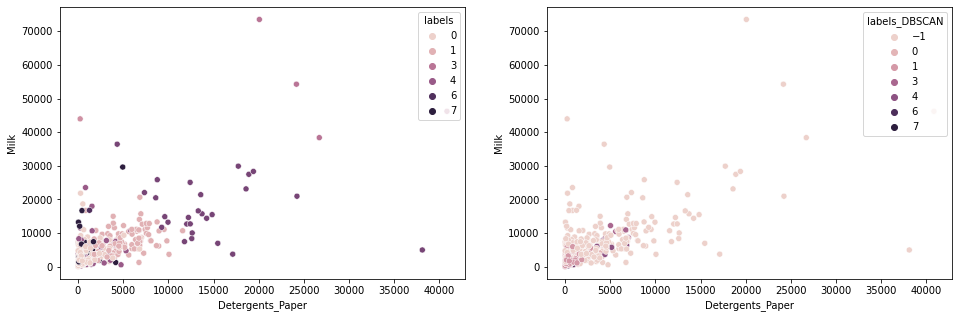

In [24]:
fig, ax = plt.subplots(1,2, figsize=(16, 5))

sns.scatterplot(customers['Detergents_Paper'], customers['Milk'], hue=customers['labels'], data=customers, ax=ax[0])
sns.scatterplot(customers['Detergents_Paper'], customers['Milk'], hue=customers['labels_DBSCAN'], data=customers, ax=ax[1])
plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

c:\users\beatr\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\beatr\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


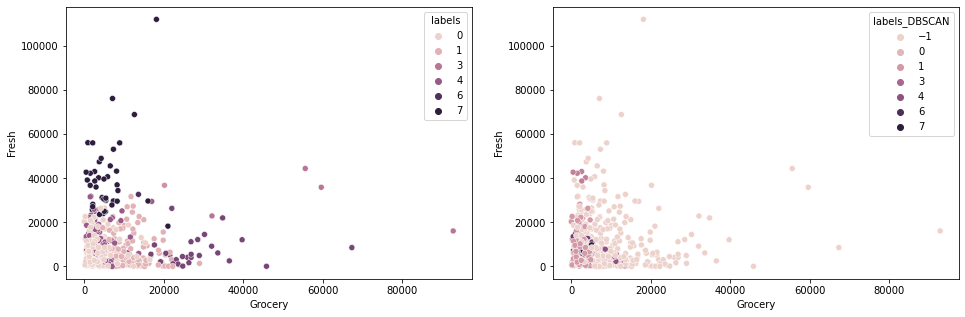

In [25]:
fig, ax = plt.subplots(1,2, figsize=(16, 5))

sns.scatterplot(customers['Grocery'], customers['Fresh'], hue=customers['labels'], data=customers, ax=ax[0])
sns.scatterplot(customers['Grocery'], customers['Fresh'], hue=customers['labels_DBSCAN'], data=customers, ax=ax[1])
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

c:\users\beatr\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\beatr\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


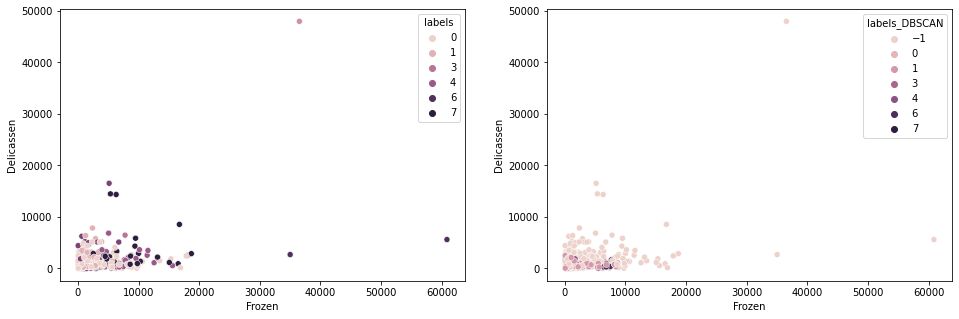

In [26]:
fig, ax = plt.subplots(1,2, figsize=(16, 5))

sns.scatterplot(customers['Frozen'], customers['Delicassen'], hue=customers['labels'], data=customers, ax=ax[0])
sns.scatterplot(customers['Frozen'], customers['Delicassen'], hue=customers['labels_DBSCAN'], data=customers, ax=ax[1])
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [27]:
# Your code here:
customers.groupby(["labels", "labels_DBSCAN"]).mean()

Channel    Region         Fresh          Milk  \
labels labels_DBSCAN                                                   
0      -1             1.000000  3.000000   8855.063830   5890.957447   
        1             1.000000  3.000000   8802.171875   1872.968750   
1      -1             2.000000  2.689655   8460.333333   8106.022989   
        0             2.000000  3.000000  11401.000000   3536.200000   
        3             2.000000  3.000000   2357.200000  10224.800000   
        4             2.000000  3.000000   3068.142857   6095.857143   
2      -1             1.000000  3.000000  36847.000000  43950.000000   
3      -1             2.000000  3.000000  29862.500000  53080.750000   
4      -1             1.094340  1.415094  11261.415094   4087.905660   
        5             1.000000  1.000000   9837.863636   1751.863636   
        6             1.000000  1.000000   6823.000000   1943.000000   
        7             1.000000  2.000000   7494.600000   1537.600000   
5      -1             2.000000  2.296296   6823.666667  17213.259259   
6      -1             1.000000  2.500000  22015.500000   9937.000000   
7      -1             1.058824  2.735294  40217.058824   5650.235294   
        1             1.000000  3.000000  30034.500000   1188.500000   
        2             1.000000  3.000000  41446.600000   1421.200000   

                           Grocery        Frozen  Detergents_Paper  \
labels labels_DBSCAN                                                 
0      -1              6138.085106   4186.042553       1524.574468   
        1              2431.734375   2128.164062        498.765625   
1      -1             12716.597701   1439.839080       5112.000000   
        0              6729.000000    720.200000       3561.000000   
        3             11862.800000    609.600000       5780.000000   
        4             10355.000000    994.000000       4675.571429   
2      -1             20170.000000  36534.000000        239.000000   
3      -1             60015.750000   3262.250000      27942.250000   
4      -1              5109.245283   3611.660377       1204.188679   
        5              2161.681818   1513.181818        333.954545   
        6              2372.666667   6780.333333        386.500000   
        7              3383.000000   2575.400000        227.400000   
5      -1             28379.222222   1876.148148      14194.592593   
6      -1              7844.000000  47939.000000        671.500000   
7      -1              6492.029412   7593.558824       1004.647059   
        1              1898.500000   2340.500000        356.500000   
        2              2167.600000   1276.400000        416.200000   

                        Delicassen  
labels labels_DBSCAN                
0      -1              1732.723404  
        1               740.179688  
1      -1              1552.655172  
        0               258.200000  
        3               572.800000  
        4              1826.428571  
2      -1             47943.000000  
3      -1              3082.250000  
4      -1              1361.377358  
        5               669.045455  
        6               613.666667  
        7               941.000000  
5      -1              2684.037037  
6      -1              4153.500000  
7      -1              2964.705882  
        1               855.000000  
        2               784.800000

In [28]:
customers.groupby('labels').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.00000,3.000000,8816.377143,2952.085714,3427.154286,2680.851429,774.268571,1006.748571,0.462857
1,2.00000,2.740385,7945.355769,7852.884615,12228.730769,1335.317308,5040.173077,1461.740385,-0.423077
2,1.00000,3.000000,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000,-1.000000
3,2.00000,3.000000,29862.500000,53080.750000,60015.750000,3262.250000,27942.250000,3082.250000,-1.000000
4,1.05814,1.313953,10368.593023,3192.395349,4063.930233,3235.662791,867.732558,1107.662791,1.488372
5,2.00000,2.296296,6823.666667,17213.259259,28379.222222,1876.148148,14194.592593,2684.037037,-1.000000
6,1.00000,2.500000,22015.500000,9937.000000,7844.000000,47939.000000,671.500000,4153.500000,-1.000000
7,1.04878,2.780488,39870.292683,4916.853659,5740.585366,6566.926829,901.268293,2595.951220,-0.536585


In [29]:
customers.groupby("labels_DBSCAN").mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.490196,2.45098,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588,2.737255
0,2.000000,3.00000,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,1.000000
1,1.000000,3.00000,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154,0.107692
2,1.000000,3.00000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,7.000000
3,2.000000,3.00000,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000,1.000000
4,2.000000,3.00000,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,1.000000
5,1.000000,1.00000,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455,4.000000
6,1.000000,1.00000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,4.000000
7,1.000000,2.00000,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000,4.000000


Which algorithm appears to perform better?

In [30]:
# Your observations here

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [31]:
# Your code here

In [32]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [33]:
# Your code here

In [34]:
# Your comment here